### Support Vector Classifier Task

#### 심장마비 가능성 예측


#### feature
- age: 환자의 나이  
- sex: 환자의 성별 (0 = female, 1 = male).  
- cp: 흉통성 (1 = typical angina(전형 협심증), 2 = atypical angina(비전형 협심증), 3 = non-anginal pain(비협심증), 4 = asymptomatic(무증상))  
- trestbps: 정지 혈압(mmHg)  
- chol: 혈청 콜레스테롤 수치(mg/dl)  
- fbs: 공복혈당 (> 120mg/dl) (1 = true, 0 = false)  
- restecg: 정지 심전도 결과 (0 = normal, 1 = having ST-T wave abnormality(ST-T파 이상), 2 = probable or definite left ventricular hypertrophy(좌심실 비대 가능성 또는 확실성))  
- thalach: 최대 심박수  
- exang: 운동 유발 협심증 (1 = yes, 0 = no)  
- oldpeak: 휴식과 관련된 운동으로 인한 ST 우울증  
- slope: 피크 운동 ST 세그먼트의 기울기  
- ca: 형광 투시법으로 채색된 주요 혈관의 수  
- thal: 탈라세미아(혈액장애의 일종) results (3 = normal, 6 = fixed defect(고정결함), 7 = reversible defect(가역결함))  

#### target
- output : 1 = 심장마비 존재, 0 = 심장마비 없음

In [1]:
import pandas as pd

h_df = pd.read_csv('./datasets/heart.csv')
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
h_df.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [4]:
h_df.duplicated().sum()

1

In [5]:
h_df.drop_duplicates(inplace=True)

In [6]:
h_df.duplicated().sum()

0

In [13]:
h_df.reset_index(drop=True, inplace=True)
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = h_df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [8]:
corr['output'].sort_values(ascending=False)[1:]

cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.221476
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64

<Axes: >

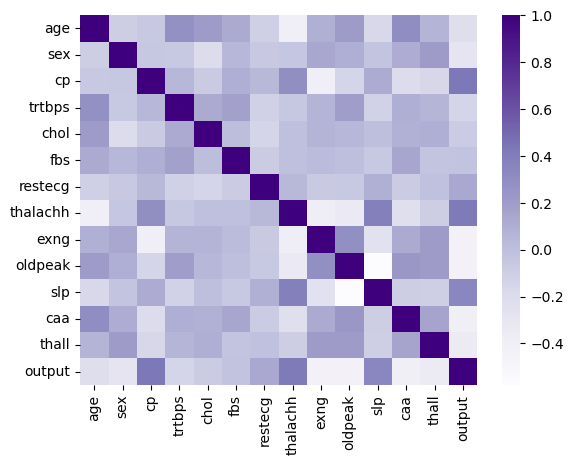

In [9]:
sns.heatmap(corr, cmap="Purples")

In [10]:
# sns.heatmap(h_df, cmap="Purples")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='slp', ylabel='cp'>

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


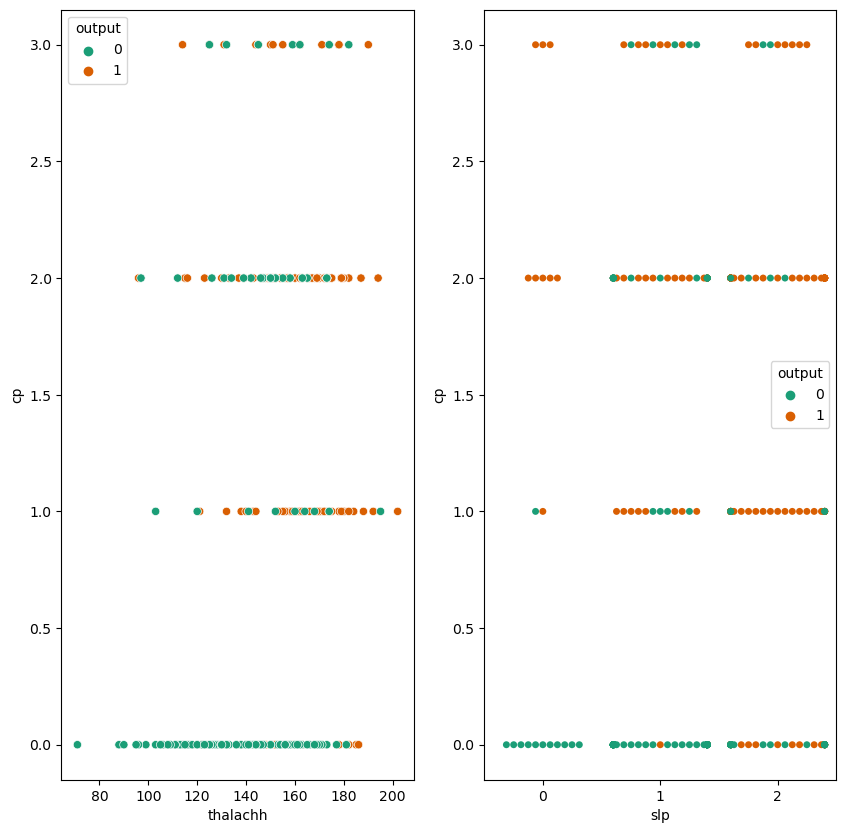

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

sns.scatterplot(x='thalachh', y='cp', hue='output', palette="Dark2", data=h_df, ax=ax1)
sns.swarmplot(x='slp', y='cp', hue='output', palette="Dark2", data=h_df, ax=ax2)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

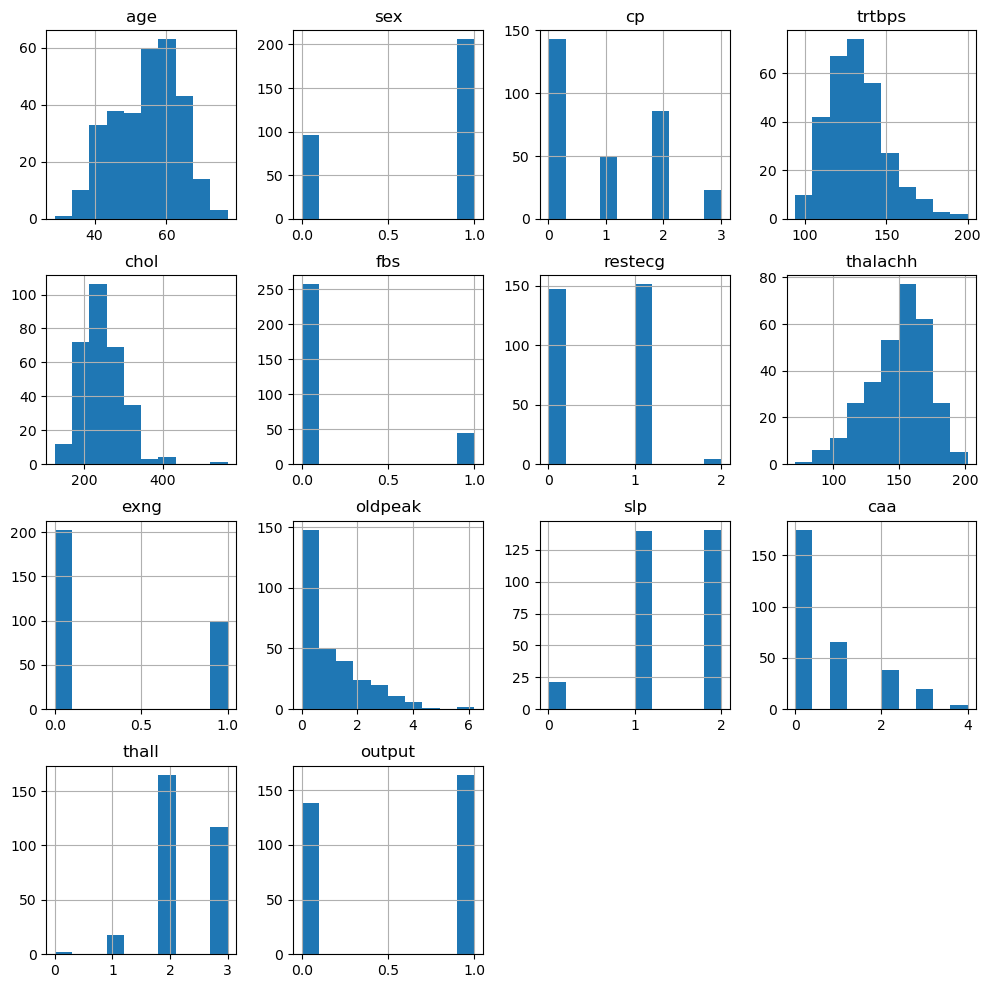

In [12]:
h_df.hist(figsize=(12, 12))